<a href="https://colab.research.google.com/github/rirhamni/python_11/blob/main/robi11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
cd /content/drive/MyDrive/Colab Notebooks/dataset

/content/drive/.shortcut-targets-by-id/1rSH6TO8vo9ZBtgp9IawCTkiXdv2Yj-DC/dataset


In [37]:
ls

GMB_01/  GMB_03/  GMB_05/  GMB_07/  GMB_09/  GMB_11/
GMB_02/  GMB_04/  GMB_06/  GMB_08/  GMB_10/  nonGMB/


In [38]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [39]:
print("[INFO] loading images...")
imagePaths1 = paths.list_images("GMB_01")
imagePaths2 = paths.list_images("GMB_03")
imagePaths3 = paths.list_images("GMB_07")
imagePaths4 = paths.list_images("GMB_08")
imagePaths5 = paths.list_images("GMB_09")
data = []
labels = []

[INFO] loading images...


In [40]:
for imagePath in imagePaths1:
  image = Image.open(imagePath)
  image = np.array(image.resize((168, 168))) / 255.0 #normalisasi
  data.append(image)

  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)
for imagePath in imagePaths2:
  image = Image.open(imagePath)
  image = np.array(image.resize((168, 168))) / 255.0 #normalisasi
  data.append(image)

  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)
for imagePath in imagePaths3:
  image = Image.open(imagePath)
  image = np.array(image.resize((168, 168))) / 255.0 #normalisasi
  data.append(image)

  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)
for imagePath in imagePaths4:
  image = Image.open(imagePath)
  image = np.array(image.resize((168, 168))) / 255.0 #normalisasi
  data.append(image)

  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)
for imagePath in imagePaths5:
  image = Image.open(imagePath)
  image = np.array(image.resize((168, 168))) / 255.0 #normalisasi
  data.append(image)

  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [41]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [42]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [43]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [44]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(435, 168, 168, 3)
(146, 168, 168, 3)


In [45]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(168,168,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 166, 166, 8)       224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 83, 83, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 81, 81, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 40, 40, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               2560100   
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [46]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [47]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=32)

Epoch 1/30
14/14 [==============================] - 6s 439ms/step - loss: 2.4838 - accuracy: 0.2138 - val_loss: 1.5429 - val_accuracy: 0.3904
Epoch 2/30
14/14 [==============================] - 6s 406ms/step - loss: 1.5209 - accuracy: 0.3816 - val_loss: 1.4402 - val_accuracy: 0.4315
Epoch 3/30
14/14 [==============================] - 6s 407ms/step - loss: 1.3481 - accuracy: 0.5080 - val_loss: 1.2847 - val_accuracy: 0.4041
Epoch 4/30
14/14 [==============================] - 6s 408ms/step - loss: 1.0712 - accuracy: 0.6368 - val_loss: 1.0598 - val_accuracy: 0.5753
Epoch 5/30
14/14 [==============================] - 6s 409ms/step - loss: 0.8477 - accuracy: 0.7218 - val_loss: 0.9067 - val_accuracy: 0.6575
Epoch 6/30
14/14 [==============================] - 6s 410ms/step - loss: 0.6215 - accuracy: 0.8414 - val_loss: 0.8793 - val_accuracy: 0.6233
Epoch 7/30
14/14 [==============================] - 6s 412ms/step - loss: 0.5070 - accuracy: 0.8322 - val_loss: 0.7108 - val_accuracy: 0.7123
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


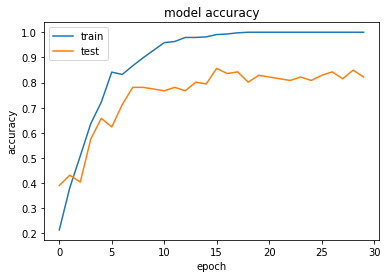

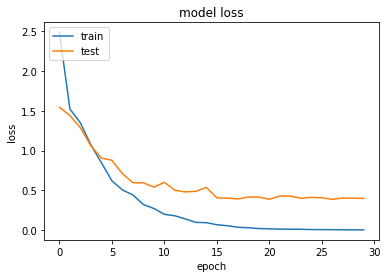

In [48]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.89      0.89      0.89        27
      GMB_03       0.82      0.69      0.75        26
      GMB_07       0.79      0.82      0.81        33
      GMB_08       0.71      0.83      0.76        29
      GMB_09       0.93      0.87      0.90        31

    accuracy                           0.82       146
   macro avg       0.83      0.82      0.82       146
weighted avg       0.83      0.82      0.82       146



In [55]:
cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [56]:
ls

dataset@  daung1.jpg  nnmodel_scene/  robi11.ipynb


In [57]:
model1.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [58]:
import cv2
import matplotlib.pyplot as plt
image1='daung1.jpg'

<class 'numpy.ndarray'>


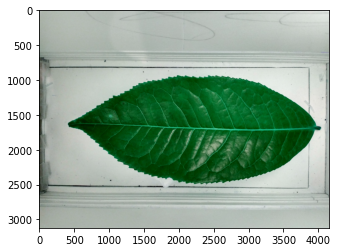

In [59]:
img_array = cv2.imread(image1)
print(type(img_array))
plt.imshow(img_array)
plt.show()


In [60]:
image_testing = Image.open('daung1.jpg')
image_testing = np.array(image_testing.resize((168, 168))) / 255.0
image_testing.shape

(168, 168, 3)

In [61]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 168, 168, 3)


In [62]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[2.2760966e-01 7.0697300e-02 6.9940460e-01 2.2883394e-03 5.1117453e-08]]
['GMB_07']
